# Climate Change Analysis

## Import Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## Load data

In [63]:
data = pd.read_csv("climate_data.csv")
print(data.shape)
data.info
data.head()

(208, 8)


,year,week_no,latitude,longitude,temperature,CO2_ppm,sea_level_mm,emission
0,2019,1,-22.582779,-178.177830,9.969913,409.669601,-92.043712,826.754106
1,2019,2,81.128575,-122.109101,8.929057,403.944919,-63.978848,105.300915
2,2019,3,41.758910,17.544164,20.790554,406.740819,-31.240929,449.050501
3,2019,4,17.758527,69.082271,18.958313,410.236993,1.304553,52.261162
4,2019,5,-61.916645,54.706053,18.120599,405.697933,25.882951,47.932016


## EDA

              year     week_no    latitude   longitude  temperature  \
count   208.000000  208.000000  208.000000  208.000000   208.000000   
mean   2020.500000   26.500000   -3.489057    4.381345    14.731388   
std       1.120731   15.044539   53.347456  105.609740     4.949645   
min    2019.000000    1.000000  -89.006019 -178.177830     3.490394   
25%    2019.750000   13.750000  -49.428219  -78.997411    11.016354   
50%    2020.500000   26.500000   -0.992474   14.990356    14.735535   
75%    2021.250000   39.250000   42.818983   90.644047    18.081688   
max    2022.000000   52.000000   87.639649  176.581851    30.394404   

          CO2_ppm  sea_level_mm     emission  
count  208.000000    208.000000   208.000000  
mean   409.963056      6.197923   198.215256  
std      5.017317     48.092736   203.038037  
min    396.515567   -109.940298     0.990445  
25%    407.232201    -28.143487    47.007727  
50%    409.974511      6.374487   134.756151  
75%    413.324129     34.324804

c:\Users\Shivtej\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


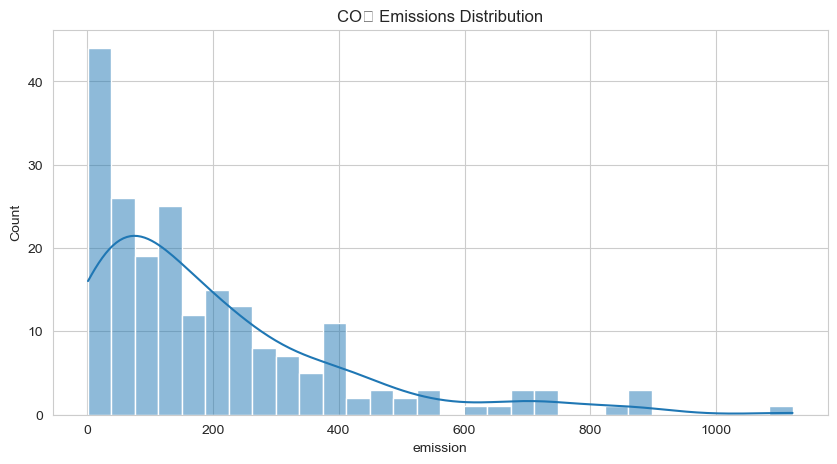

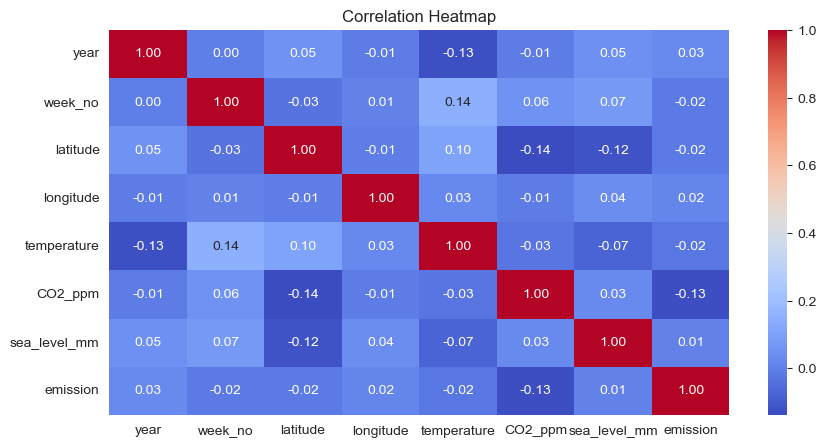

c:\Users\Shivtej\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


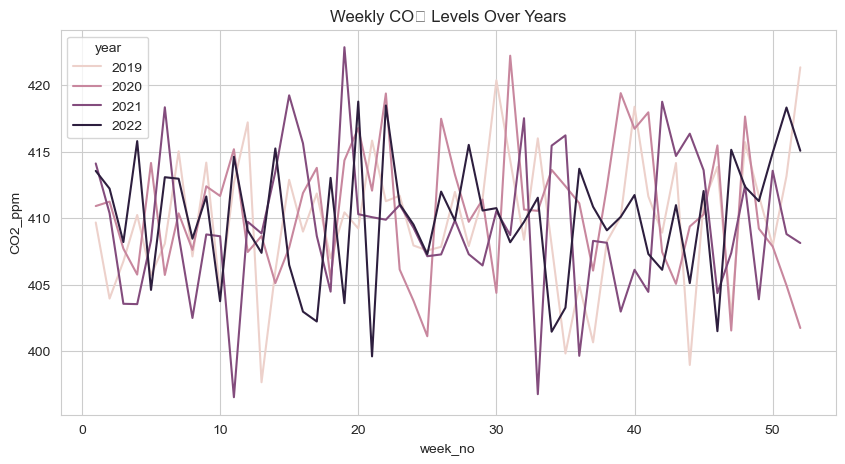

In [64]:
print(data.describe())

# Emission distribution
sns.histplot(data["emission"], bins=30, kde=True)
plt.title("CO₂ Emissions Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# CO₂ trend over weeks and years
sns.lineplot(data=data, x="week_no", y="CO2_ppm", hue="year")
plt.title("Weekly CO₂ Levels Over Years")
plt.show()

## Preprocessing

In [65]:
X = data.drop("emission", axis=1)
y = data["emission"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##  Feature Engineering

In [66]:

data["CO2_roll_mean"] = data["CO2_ppm"].rolling(window=3).mean().fillna(method="bfill")
data["sea_level_diff"] = data["sea_level_mm"].diff().fillna(0)
data["temp_lag1"] = data["temperature"].shift(1).fillna(method="bfill")


X = data[["year", "week_no", "latitude", "longitude", "temperature", "CO2_ppm",
          "sea_level_mm", "CO2_roll_mean", "sea_level_diff", "temp_lag1"]]
y = data["emission"]

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


C:\Users\Shivtej\AppData\Local\Temp\ipykernel_10836\1122121481.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["CO2_roll_mean"] = data["CO2_ppm"].rolling(window=3).mean().fillna(method="bfill")
C:\Users\Shivtej\AppData\Local\Temp\ipykernel_10836\1122121481.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["temp_lag1"] = data["temperature"].shift(1).fillna(method="bfill")


## Model Selection And Training 

In [67]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## Model Evaluation

📊 Random Forest:
MAE: 167.20010406544856
MSE: 54286.67554533548
R²: -0.1890356371386246


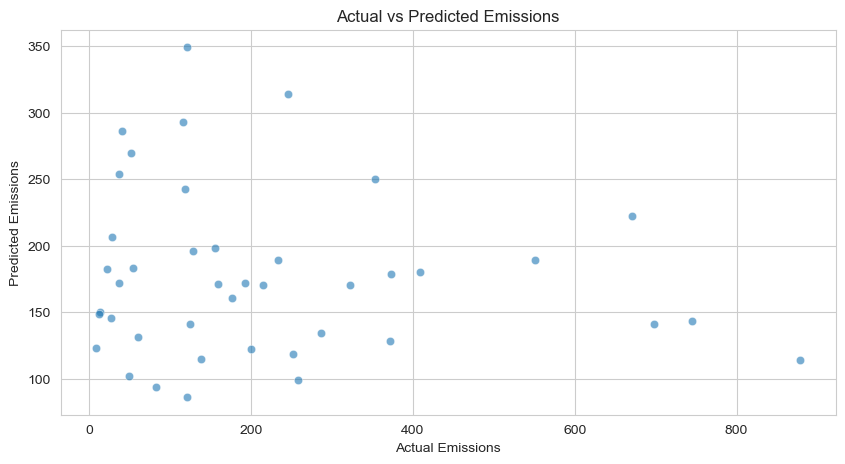

📊 XGBoost:
MAE: 156.42497062169892
MSE: 56116.40643598931
R²: -0.22911205024562942


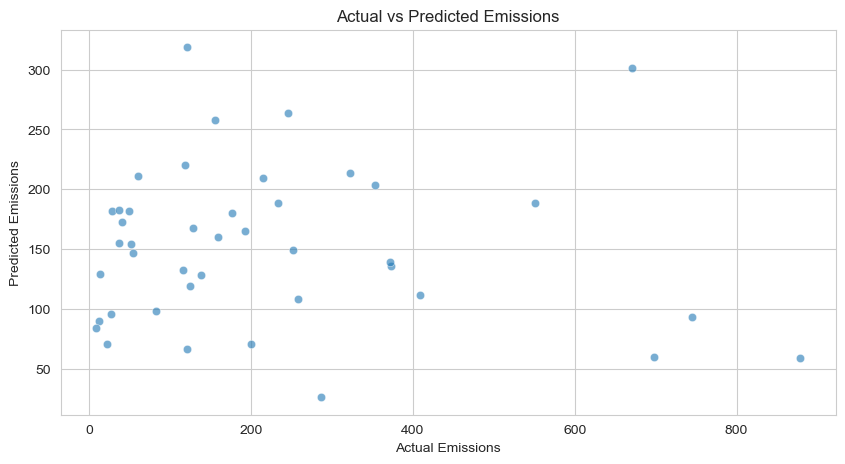

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("Actual Emissions")
    plt.ylabel("Predicted Emissions")
    plt.title("Actual vs Predicted Emissions")
    plt.show()

print("📊 Random Forest:")
evaluate_model(rf, X_test, y_test)

print("📊 XGBoost:")
evaluate_model(xgb, X_test, y_test)

import pickle

# Save Random Forest model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)



## Future Projections (2023)

In [69]:
# Simulate future 2023 data
future = data[data["year"] == 2022].copy()
future["year"] = 2023

# Recalculate rolling and lag features
future["CO2_roll_mean"] = future["CO2_ppm"].rolling(3).mean().fillna(method="bfill")
future["sea_level_diff"] = future["sea_level_mm"].diff().fillna(0)
future["temp_lag1"] = future["temperature"].shift(1).fillna(method="bfill")

X_future = future[X.columns]
X_future_scaled = scaler.transform(X_future)
future["predicted_emission"] = rf.predict(X_future_scaled)

future[["year", "week_no", "predicted_emission"]].head()


C:\Users\Shivtej\AppData\Local\Temp\ipykernel_10836\2891434473.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["CO2_roll_mean"] = future["CO2_ppm"].rolling(3).mean().fillna(method="bfill")
C:\Users\Shivtej\AppData\Local\Temp\ipykernel_10836\2891434473.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["temp_lag1"] = future["temperature"].shift(1).fillna(method="bfill")


,year,week_no,predicted_emission
156,2023,1,209.645741
157,2023,2,123.893655
158,2023,3,343.528458
159,2023,4,114.927434
160,2023,5,478.088691


## Scenario Analysis (e.g., 10% CO₂ increase)

C:\Users\Shivtej\AppData\Local\Temp\ipykernel_10836\1222006227.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  scenario["CO2_roll_mean"] = scenario["CO2_ppm"].rolling(3).mean().fillna(method="bfill")


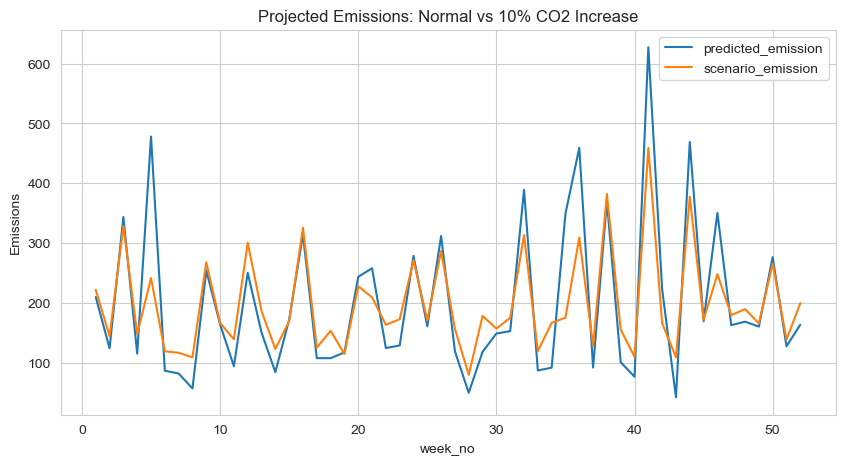

In [70]:
scenario = future.copy()
scenario["CO2_ppm"] *= 1.10  # increase CO2 artificially
scenario["CO2_roll_mean"] = scenario["CO2_ppm"].rolling(3).mean().fillna(method="bfill")

X_scenario = scenario[X.columns]
X_scenario_scaled = scaler.transform(X_scenario)
scenario["scenario_emission"] = rf.predict(X_scenario_scaled)

comparison = scenario[["week_no", "predicted_emission", "scenario_emission"]]
comparison.plot(x="week_no", title="Projected Emissions: Normal vs 10% CO2 Increase")
plt.ylabel("Emissions")
plt.show()
